<a href="https://colab.research.google.com/github/celiahc823/MCD_UNISON/blob/main/analisisMuerteMaternaSonora_2009_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analizando un conjunto de datos con Pandas**

# Instrucciones
Seleccionar un conjunto de datos libres de la Secretaría de Salud en:

[http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html]

Entre los archivos que puedes utilizar se encuentra:



*   Exceso de Mortalidada
*   Egresos Hospitalarios
*   Muerte Materna
*   Nacimientos
*   Lesiones
*   Urgencias
*   Defunciones
*   Servicios Otorgados


Entre los detalles que tiene que tener tu libreta son:



1.   Descarga los datos directamente con pandas, muestra el tipo de datos más importantes y genera un indice con las fechas, usando una transformación a tipo timestamp.
2.   Filtra los datos para un solo año y para un estado solamente (Sonora, por ejemplo)
3. Modifica los valores de variables cualitativas para que sean más representativas en su análisis
4. Realiza un análisis exploratorio básico usando pandas, haciendo algunas gráficas que muestren algunos detalles importantes o interesantes y con algunas regrupaciones simples o complejas.
5. Escribir al final una reflexión de las cosas que se encontraron que se consideran importantes o interesantes.

# **Ubicación URL**
Para tener el link de descarga desde la página es necesario ubicarlo, por lo cual se abre el modo desarrollador y se ubica la posición para copiarlo y descargar de forma directa.

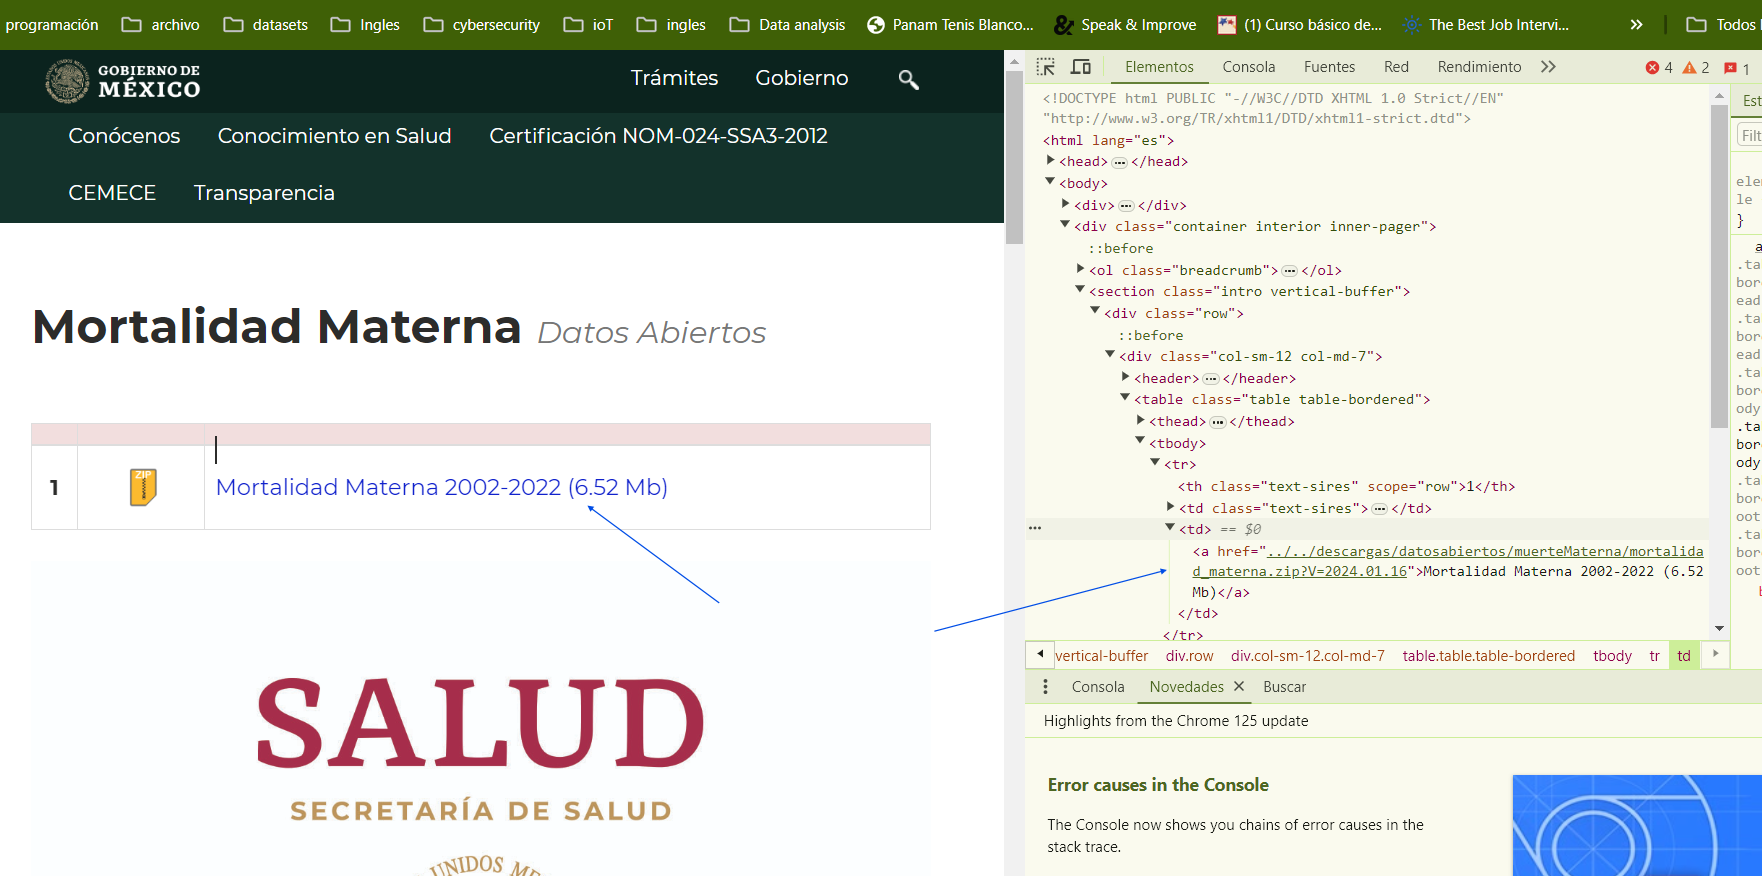



---



#*1.* Descarga los datos directamente con pandas, muestra el tipo de datos más muestra el tipo de datos más importantes y genera un indice con las fechas, usando una transformación a tipo timestamp.



---


In [1]:
import pandas as pd
import zipfile
import requests
import io
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# URL del archivo ZIP
url = "http://www.dgis.salud.gob.mx/descargas/datosabiertos/muerteMaterna/mortalidad_materna.zip?V=2024.01.16"

# Descargar el archivo ZIP
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# Listar los archivos en el ZIP
print(z.namelist())

['mortalidad_materna_2002_2022.xlsx']


In [2]:
# Extraer y leer el archivo único de la carpeta
with z.open('mortalidad_materna_2002_2022.xlsx') as f:
    df = pd.read_excel(f, engine='openpyxl')

# Mostrar las primeras filas del DataFrame
print(df.head())

   ANIO_NACIMIENTO  MES_NACIMIENTO  MES_NACIMIENTOD  DIA_NACIMIENTO  EDAD  \
0             1967               5             MAYO               4    35   
1             1965               0  NO ESPECIFICADO               0    37   
2             1956               2          FEBRERO               4    46   
3             1980               9       SEPTIEMBRE               3    22   
4             1947              12        DICIEMBRE              20    54   

   ESTADO_CONYUGAL ESTADO_CONYUGALD  ENTIDAD_RESIDENCIA  ENTIDAD_RESIDENCIAD  \
0                1          SOLTERO                  16  MICHOACÁN DE OCAMPO   
1                5           CASADO                  20               OAXACA   
2                5           CASADO                  12             GUERRERO   
3                5           CASADO                  28           TAMAULIPAS   
4                5           CASADO                  27              TABASCO   

   MUNICIPIO_RESIDENCIA  ... DIA_REGISTRO  ANIO_CERTIFIC

In [3]:
# Mostrar el listado de columnas
print("\nListado de columnas del DataFrame:")
print(df.columns)

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Listado de columnas del DataFrame:
Index(['ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'MES_NACIMIENTOD',
       'DIA_NACIMIENTO', 'EDAD', 'ESTADO_CONYUGAL', 'ESTADO_CONYUGALD',
       'ENTIDAD_RESIDENCIA', 'ENTIDAD_RESIDENCIAD', 'MUNICIPIO_RESIDENCIA',
       'MUNICIPIO_RESIDENCIAD', 'LOCALIDAD_RESIDENCIA',
       'LOCALIDAD_RESIDENCIAD', 'TAMANIO_LOCALIDAD', 'TAMANIO_LOCALIDADD',
       'OCUPACION_HABITUAL', 'OCUPACION_HABITUALD', 'ESCOLARIDAD',
       'ESCOLARIDADD', 'DERECHOHABIENCIA', 'DERECHOHABIENCIAD',
       'ENTIDAD_OCURRENCIA', 'ENTIDAD_OCURRENCIAD', 'MUNICIPIO_OCURRENCIA',
       'MUNICIPIO_OCURRENCIAD', 'LOCALIDAD_OCURRENCIA',
       'LOCALIDAD_OCURRENCIAD', 'SITIO_DEFUNCION', 'SITIO_DEFUNCIOND',
       'ANIO_DEFUNCION', 'MES_DEFUNCION', 'MES_DEFUNCIOND', 'DIA_DEFUNCION',
       'HORA_DEFUNCION', 'MINUTOS_DEFUNCION', 'ASISTENCIA_MEDICA',
       'ASISTENCIA_MEDICAD', 'CAUSA_CIE_4', 'CAUSA_CIE_4D', 'CERTIFICO',
       'CERTIFICOD', 'ENTIDAD_REGISTRO', 'ENTIDAD_REGISTROD',
       'M



---



#*2.* Filtra los datos para un solo año y para un estado solamente (Sonora, por ejemplo)



---




In [4]:
# Filtrar el DataFrame para el Estado de Sonora y seleccionar 1 año
df_filtered = df[
    (df['ENTIDAD_REGISTROD'] == 'SONORA') &
    (df['ANIO_BASE_DATOS'] == 2009)
]

# Seleccionar los datos más importantes
df_reduced = df_filtered[['CAUSA_CIE_4D', 'CERTIFICOD', 'MUNICIPIO_REGISTROD', 'EDAD_QUINQUENALD', 'ANIO_BASE_DATOS', 'MES_REGISTRO', 'MES_REGISTROD','DIA_REGISTRO']]

# Mostrar las primeras filas del DataFrame reducido
print("\nPrimeras filas del DataFrame reducido:")
print(df_reduced.head())

# Mostrar información general del DataFrame reducido
print("\nInformación general del DataFrame reducido:")
print(df_reduced.info())


Primeras filas del DataFrame reducido:
                                           CAUSA_CIE_4D       CERTIFICOD  \
8854                     O150  ECLAMPSIA EN EL EMBARAZO      OTRO MEDICO   
8912  O998  OTRAS ENFERMEDADES ESPECIFICADAS Y AFECC...  MEDICO TRATANTE   
9002  O980  TUBERCULOSIS QUE COMPLICA EL EMBARAZO, E...      OTRO MEDICO   
9117  O995  ENFERMEDADES DEL SISTEMA RESPIRATORIO QU...  MEDICO TRATANTE   
9118  O995  ENFERMEDADES DEL SISTEMA RESPIRATORIO QU...      OTRO MEDICO   

     MUNICIPIO_REGISTROD EDAD_QUINQUENALD  ANIO_BASE_DATOS  MES_REGISTRO  \
8854          HERMOSILLO     45 a 49 años             2009            10   
8912          HERMOSILLO     30 a 34 años             2009            10   
9002          HERMOSILLO     10 a 14 años             2009             3   
9117          HERMOSILLO     25 a 29 años             2009             9   
9118          HERMOSILLO     15 a 19 años             2009            10   

     MES_REGISTROD  DIA_REGISTRO  
8854       

In [5]:
print(df_reduced['ANIO_BASE_DATOS'].dtype)
print(df_reduced['MES_REGISTRO'].dtype)
print(df_reduced['DIA_REGISTRO'].dtype)

print(df_reduced['ANIO_BASE_DATOS'].unique())
print(df_reduced['MES_REGISTRO'].unique())
print(df_reduced['DIA_REGISTRO'].unique())

int64
int64
int64
[2009]
[10  3  9  5 11  8  7  1]
[20 22 30  6  8 12 21 13 16 10  3 15 29 23]


In [6]:
#Fecha
df_reduced['FECHA'] = pd.to_datetime(
    df_reduced['ANIO_BASE_DATOS'].astype(str) + '-' +
    df_reduced['MES_REGISTRO'].astype(str) + '-' +
    df_reduced['DIA_REGISTRO'].astype(str),
    format='%Y-%m-%d',
    errors='coerce'
)

<ipython-input-6-eb36b5085100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['FECHA'] = pd.to_datetime(


In [7]:
#Información de tipo de datos
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 8854 to 10033
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CAUSA_CIE_4D         18 non-null     object        
 1   CERTIFICOD           18 non-null     object        
 2   MUNICIPIO_REGISTROD  18 non-null     object        
 3   EDAD_QUINQUENALD     18 non-null     object        
 4   ANIO_BASE_DATOS      18 non-null     int64         
 5   MES_REGISTRO         18 non-null     int64         
 6   MES_REGISTROD        18 non-null     object        
 7   DIA_REGISTRO         18 non-null     int64         
 8   FECHA                18 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.4+ KB


In [8]:
#Revisar primeras filas
df_reduced.head()


,CAUSA_CIE_4D,CERTIFICOD,MUNICIPIO_REGISTROD,EDAD_QUINQUENALD,ANIO_BASE_DATOS,MES_REGISTRO,MES_REGISTROD,DIA_REGISTRO,FECHA
8854,O150 ECLAMPSIA EN EL EMBARAZO,OTRO MEDICO,HERMOSILLO,45 a 49 años,2009,10,OCTUBRE,20,2009-10-20
8912,O998 OTRAS ENFERMEDADES ESPECIFICADAS Y AFECC...,MEDICO TRATANTE,HERMOSILLO,30 a 34 años,2009,10,OCTUBRE,22,2009-10-22
9002,"O980 TUBERCULOSIS QUE COMPLICA EL EMBARAZO, E...",OTRO MEDICO,HERMOSILLO,10 a 14 años,2009,3,MARZO,30,2009-03-30
9117,O995 ENFERMEDADES DEL SISTEMA RESPIRATORIO QU...,MEDICO TRATANTE,HERMOSILLO,25 a 29 años,2009,9,SEPTIEMBRE,6,2009-09-06
9118,O995 ENFERMEDADES DEL SISTEMA RESPIRATORIO QU...,OTRO MEDICO,HERMOSILLO,15 a 19 años,2009,10,OCTUBRE,8,2009-10-08




---



#*3.* Modifica los valores de variables cualitativas para que sean más representativas en su análisis


---

In [9]:
# Renombrando las columnas
df_reduced.rename(columns={
    'CAUSA_CIE_4D': 'CAUSA',
    'CERTIFICOD': 'PERSONA QUE CERTIFICO',
    'MUNICIPIO_REGISTROD': 'MUNICIPIO DE REGISTRO',
    'EDAD_QUINQUENALD': 'GRUPO DE EDAD',
    'ANIO_BASE_DATOS': 'AÑO DE REGISTRO',
    'MES_REGISTRO': 'NUM_MES',
    'MES_REGISTROD': 'NOMBRE MES',
    'DIA_REGISTRO': 'DIA',
    'FECHA': 'FECHA'
}, inplace=True)

# Ordenar el DataFrame por fecha
df_sorted = df_reduced.sort_values(by='FECHA')

# Muestrar el DataFrame ordenado para verificar
df_sorted.head()


<ipython-input-9-eb6250425847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.rename(columns={


,CAUSA,PERSONA QUE CERTIFICO,MUNICIPIO DE REGISTRO,GRUPO DE EDAD,AÑO DE REGISTRO,NUM_MES,NOMBRE MES,DIA,FECHA
10017,O150 ECLAMPSIA EN EL EMBARAZO,OTRO MEDICO,CAJEME,20 a 24 años,2009,1,ENERO,13,2009-01-13
10033,C58X TUMOR MALIGNO DE LA PLACENTA,OTRO MEDICO,CAJEME,35 a 39 años,2009,1,ENERO,23,2009-01-23
9002,"O980 TUBERCULOSIS QUE COMPLICA EL EMBARAZO, E...",OTRO MEDICO,HERMOSILLO,10 a 14 años,2009,3,MARZO,30,2009-03-30
9210,O230 INFECCIÓN DEL RIÑÓN EN EL EMBARAZO,OTRO MEDICO,HERMOSILLO,15 a 19 años,2009,3,MARZO,30,2009-03-30
9120,"O240 DIABETES MELLITUS PREEXISTENTE TIPO 1, E...",OTRO MEDICO,HERMOSILLO,20 a 24 años,2009,5,MAYO,12,2009-05-12


---



#*4.* Realiza un análisis exploratorio básico usando pandas, haciendo algunas gráficas que muestren algunos detalles importantes o interesantes y con algunas regrupaciones simples o complejas.

---

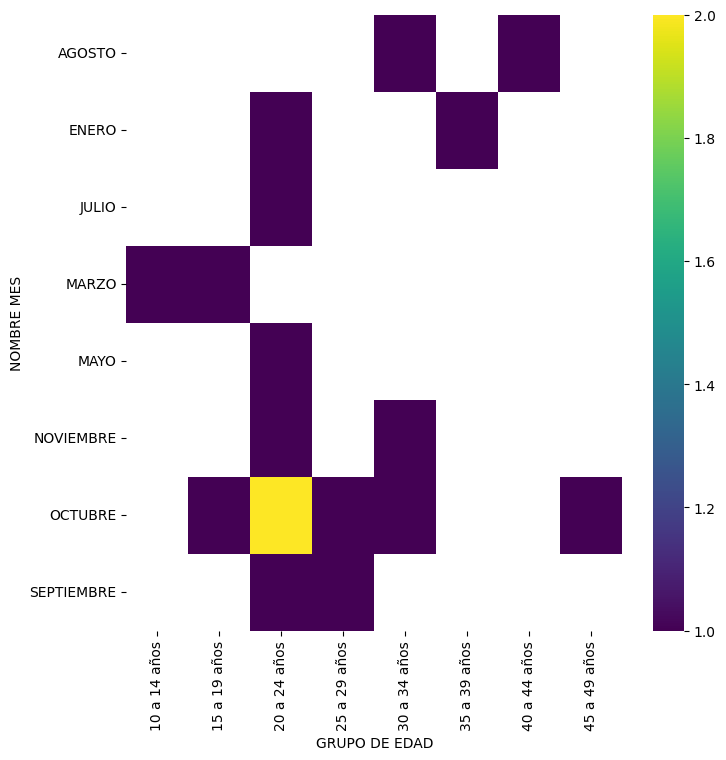

In [10]:
# @title  Gráfica de Calor

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NOMBRE MES'].value_counts()
    for x_label, grp in df_reduced.groupby('GRUPO DE EDAD')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GRUPO DE EDAD')
_ = plt.ylabel('NOMBRE MES')

Principales Hallazgos en gráfica de calor
Grupo de Edad 20 a 24 años:

Mes de Octubre: Se observa una alta concentración de registros para este grupo de edad, lo cual se destaca claramente en la gráfica con el color amarillo. Se sugiere que hay un evento o fenómeno particular que afecta predominantemente a las personas de este grupo de edad en el mes de octubre. Podría ser relacionada con eventos estacionales, cambios en la dinámica laboral o académica o factores de salud específicos para este mes.


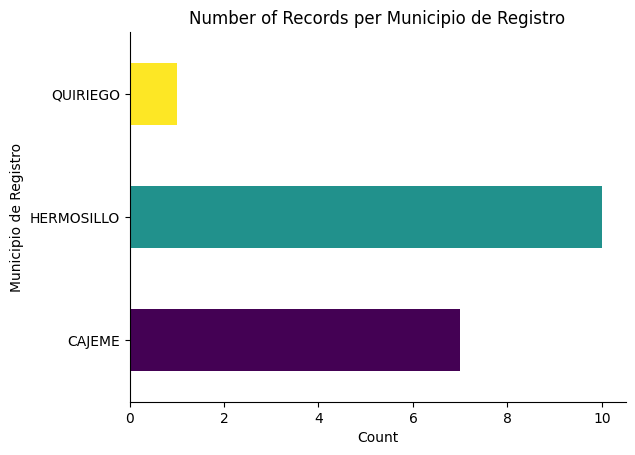

In [11]:
# @title MUNICIPIO


data = df_reduced.groupby('MUNICIPIO DE REGISTRO').size()
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
data.plot(kind='barh', color=colors)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Municipio de Registro')
plt.title('Number of Records per Municipio de Registro')
plt.show()

La gráfica sugiere que Hermosillo es el municipio con la mayor actividad registrada, seguido por Cajeme, mientras que Quiriego tiene la menor actividad, registrando solo 1 caso. Este patrón puede reflejar diferencias en la densidad de población, sin embargo este análisis sirve para tomar acciones preventivas, para buscar disminuir los casos.

In [12]:
# Agrupar por 'CAUSA' y 'NUM_MES' y obtener el tamaño de cada grupo
df_grouped = df_reduced.groupby(['CAUSA', 'NUM_MES']).size().reset_index(name='COUNT')

# Encontrar el mes con más casos para cada 'CAUSA'
df_max_month = df_grouped.loc[df_grouped.groupby('CAUSA')['COUNT'].idxmax()]
df_max_month.rename(columns={'NUM_MES': 'NUM_MES', 'COUNT': 'COUNT'}, inplace=True)

# Ordenar el DataFrame por 'COUNT' en orden descendente
df_max_month_sorted = df_max_month.sort_values(by='COUNT', ascending=False)

# Obtener la causa de muerte materna con el mayor número de casos
causa_max_casos = df_max_month_sorted.iloc[0]

# Imprimir la causa de muerte materna con el mayor número de casos
print(f"La causa de muerte materna en Sonora con el mayor número de casos es: {causa_max_casos['CAUSA']}, con {causa_max_casos['COUNT']} casos.")

La causa de muerte materna en Sonora con el mayor número de casos es: O995  ENFERMEDADES DEL SISTEMA RESPIRATORIO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO, con 4 casos.


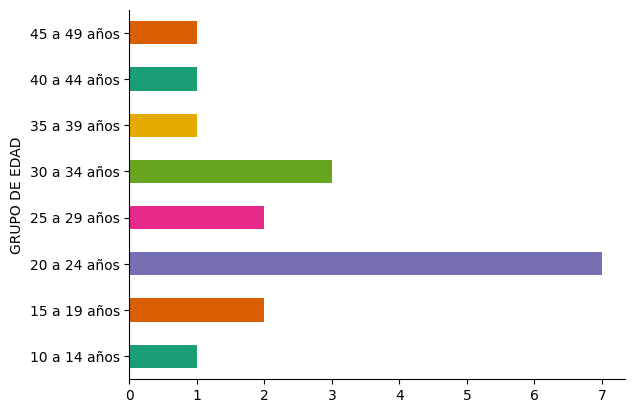

In [13]:
# @title GRUPO DE EDAD

from matplotlib import pyplot as plt
import seaborn as sns
df_sorted.groupby('GRUPO DE EDAD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

En la gráfica de Barras por grupo de edad, se distingue claramente que el grupo de 20 a 24 tiene un porcentaje mayor a los demás grupos, lo que sugiere una evaluación de caracterísitcas adicionales para ver si se encuentran patrones que sugieran, el aumento en este grupo.

---



#*5.* Escribir al final una reflexión de las cosas que se encontraron que se consideran importantes o interesantes.

---

### Conclusión

El análisis de los datos de mortalidad materna en Sonora revela varios patrones importantes:

1. **Causa Principal de Muerte Materna**:
   - La causa de muerte materna con el mayor número de casos en Sonora, en el año evaluado, se identifica claramente como ENFERMEDADES DEL SISTEMA RESPIRATORIO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO. Esta causa tiene 4 casos en el año evaluado , lo que resalta su prevalencia y sugiere que requiere una atención  de políticas de salud y prevención.

2. **Distribución Mensual de Casos**:
   - Los datos muestran que ciertos meses tienen una mayor incidencia de casos de mortalidad materna. Por ejemplo, el grupo de edad de `20 a 24 años` presenta un pico significativo de casos en el mes de `octubre`. Este patrón estacional puede estar influenciado por factores específicos que deben ser investigados más a fondo para desarrollar intervenciones efectivas.

3. **Diferencias entre Municipios**:
   - Hermosillo destaca como el municipio con el mayor número de registros, seguido por Cajeme y Quiriego con el menor número de casos. Esto podría reflejar diferencias en la densidad de población, acceso a servicios de salud y otros factores socioeconómicos que afectan la mortalidad materna.

### Recomendaciones

- **Enfoque en la Causa Principal**: Es esencial enfocarse en la causa de muerte materna más prevalente, mediante campañas de prevención, educación y mejoras en los servicios de salud relacionados.
- **Intervenciones Estacionales**: Desarrollar intervenciones específicas para los meses con mayor incidencia, especialmente para los grupos de edad más afectados.
- **Atención Diferenciada por Municipios**: Implementar políticas de salud pública diferenciadas que aborden las necesidades específicas de municipios con diferentes niveles de incidencia de mortalidad materna.

Estos hallazgos proporcionan una base sólida para futuras investigaciones y la formulación de políticas de salud pública dirigidas a reducir la mortalidad materna en Sonora.
